### Modelo de Clasificación: **Árbol de Decision**

Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,f1_score ,precision_score, recall_score

In [23]:
# Leemos el dataset
df_diabetes = pd.read_csv("diabetes.csv",encoding="ISO-8859-1",delimiter=",")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dividir los datos en variables dependientes e independientes

In [50]:
# Separamos en atributos y clase
X = df_diabetes.drop(['Outcome'], axis=1)

y = df_diabetes['Outcome']

### Dividir los datos en Train y Test

In [52]:
# Utilizamos train_test_split e indicamos que el tamaño del set de testeo sea del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelo 1: Primer acercamiento

---

1. Crear árbol de decisión sin ningún parámetro
2. Evaluar el modelo
3. Graficar

In [25]:
# Creamos el árbol de decisión 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [26]:
# Realizamos la predicción
predictions = clf.predict(X_test)

### Evaluación del modelo

#### Matriz de confusión
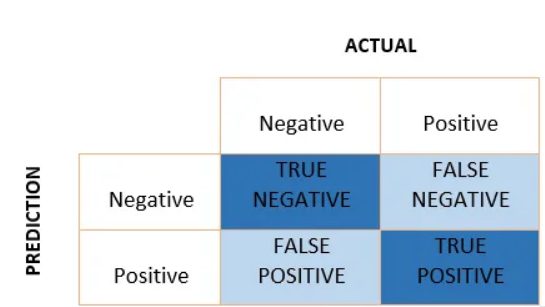

**True Positive (TP)**: El modelo predice correctamente la clase positiva (tanto la predicción como el valor real son positivos). 

**True Negative (TN)**: El modelo predice correctamente la clase negativa (tanto la predicción como el valor real son negativos). 

**False Positive (FP)**: El modelo da una predicción incorrecta de la clase negativa (predice como positivo, pero el valor real es negativo). FP también se llama **error de Tipo I**.

**False Negative (FN)**: El modelo predice incorrectamente la clase positiva (predice como negativo, pero el valor real es positivo). FN también se llama **error de Tipo II**.

### Métricas

| Métricas | Definición | Fórmula |
| -------- | ---------- | ------- |
| accuracy_score | Mide la proporción de predicciones correctas en relación con el número total de predicciones |  $$TP + TN \ \over TP+TN+FP+FN$$ |
| precision_score| De todas las predicciones positivas, ¿qué proporción es realmente positiva?. | $$TP \ \over TP+FP$$|
| recall_score: | De todos los casos positivos, ¿qué porcentaje se predice como positivo? | $$TP \ \over TP+FN$$|
| f1_score:| Combina la precisión y la sensibilidad en un solo número. Es especialmente útil cuando tenemos un desequilibrio entre las clases| $$ 2 * (Precisión * Sensibilidad) \ \over (Precisión + Sensibilidad) $$|


In [27]:
# Evaluación del modelo
print('Accuracy:',round(accuracy_score(y_test, predictions), 2))
print('Precisión:',round(precision_score(y_test, predictions),2))
print('Recall score:',round(recall_score(y_test, predictions),2))
print('F1 score:',round(f1_score(y_test, predictions),2))

Accuracy: 0.71
Precisión: 0.63
Recall score: 0.63
F1 score: 0.63


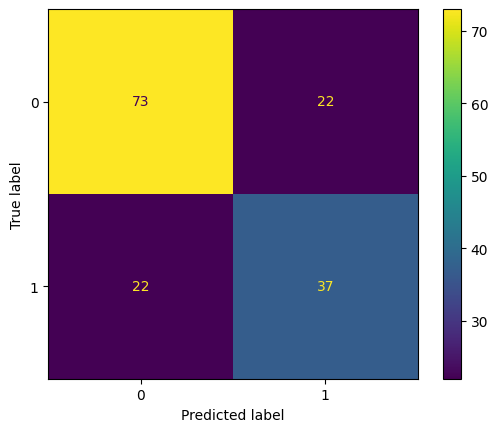

In [28]:
# Matriz de confusión
cm = confusion_matrix(y_test, predictions, labels=[0,1])
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [29]:
# Reporte de la clasificación
print('Reporte de clasificación:\n',classification_report(y_test, predictions, target_names=['No', 'Si']))

Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.77      0.77      0.77        95
          Si       0.63      0.63      0.63        59

    accuracy                           0.71       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.71      0.71      0.71       154



**Conclusiones del primer modelo**

La exactitud del modelo es moderada (71%). Sin embargo, el recall que es una métrica de gran interes en este caso particular (por ser porcentaje de casos positivos que fueron predichos correctamente) es solo del 63%.

El reporte de clasificación muestra un desbalance en el rendimiento del modelo entre las dos clases ("No" y "Si"). El modelo tiene un mejor rendimiento en la clase "No" en comparación con la clase "Si". Esto puede deberse a un desequilibrio en la distribución de las clases en el conjunto de datos.

### Gráfico

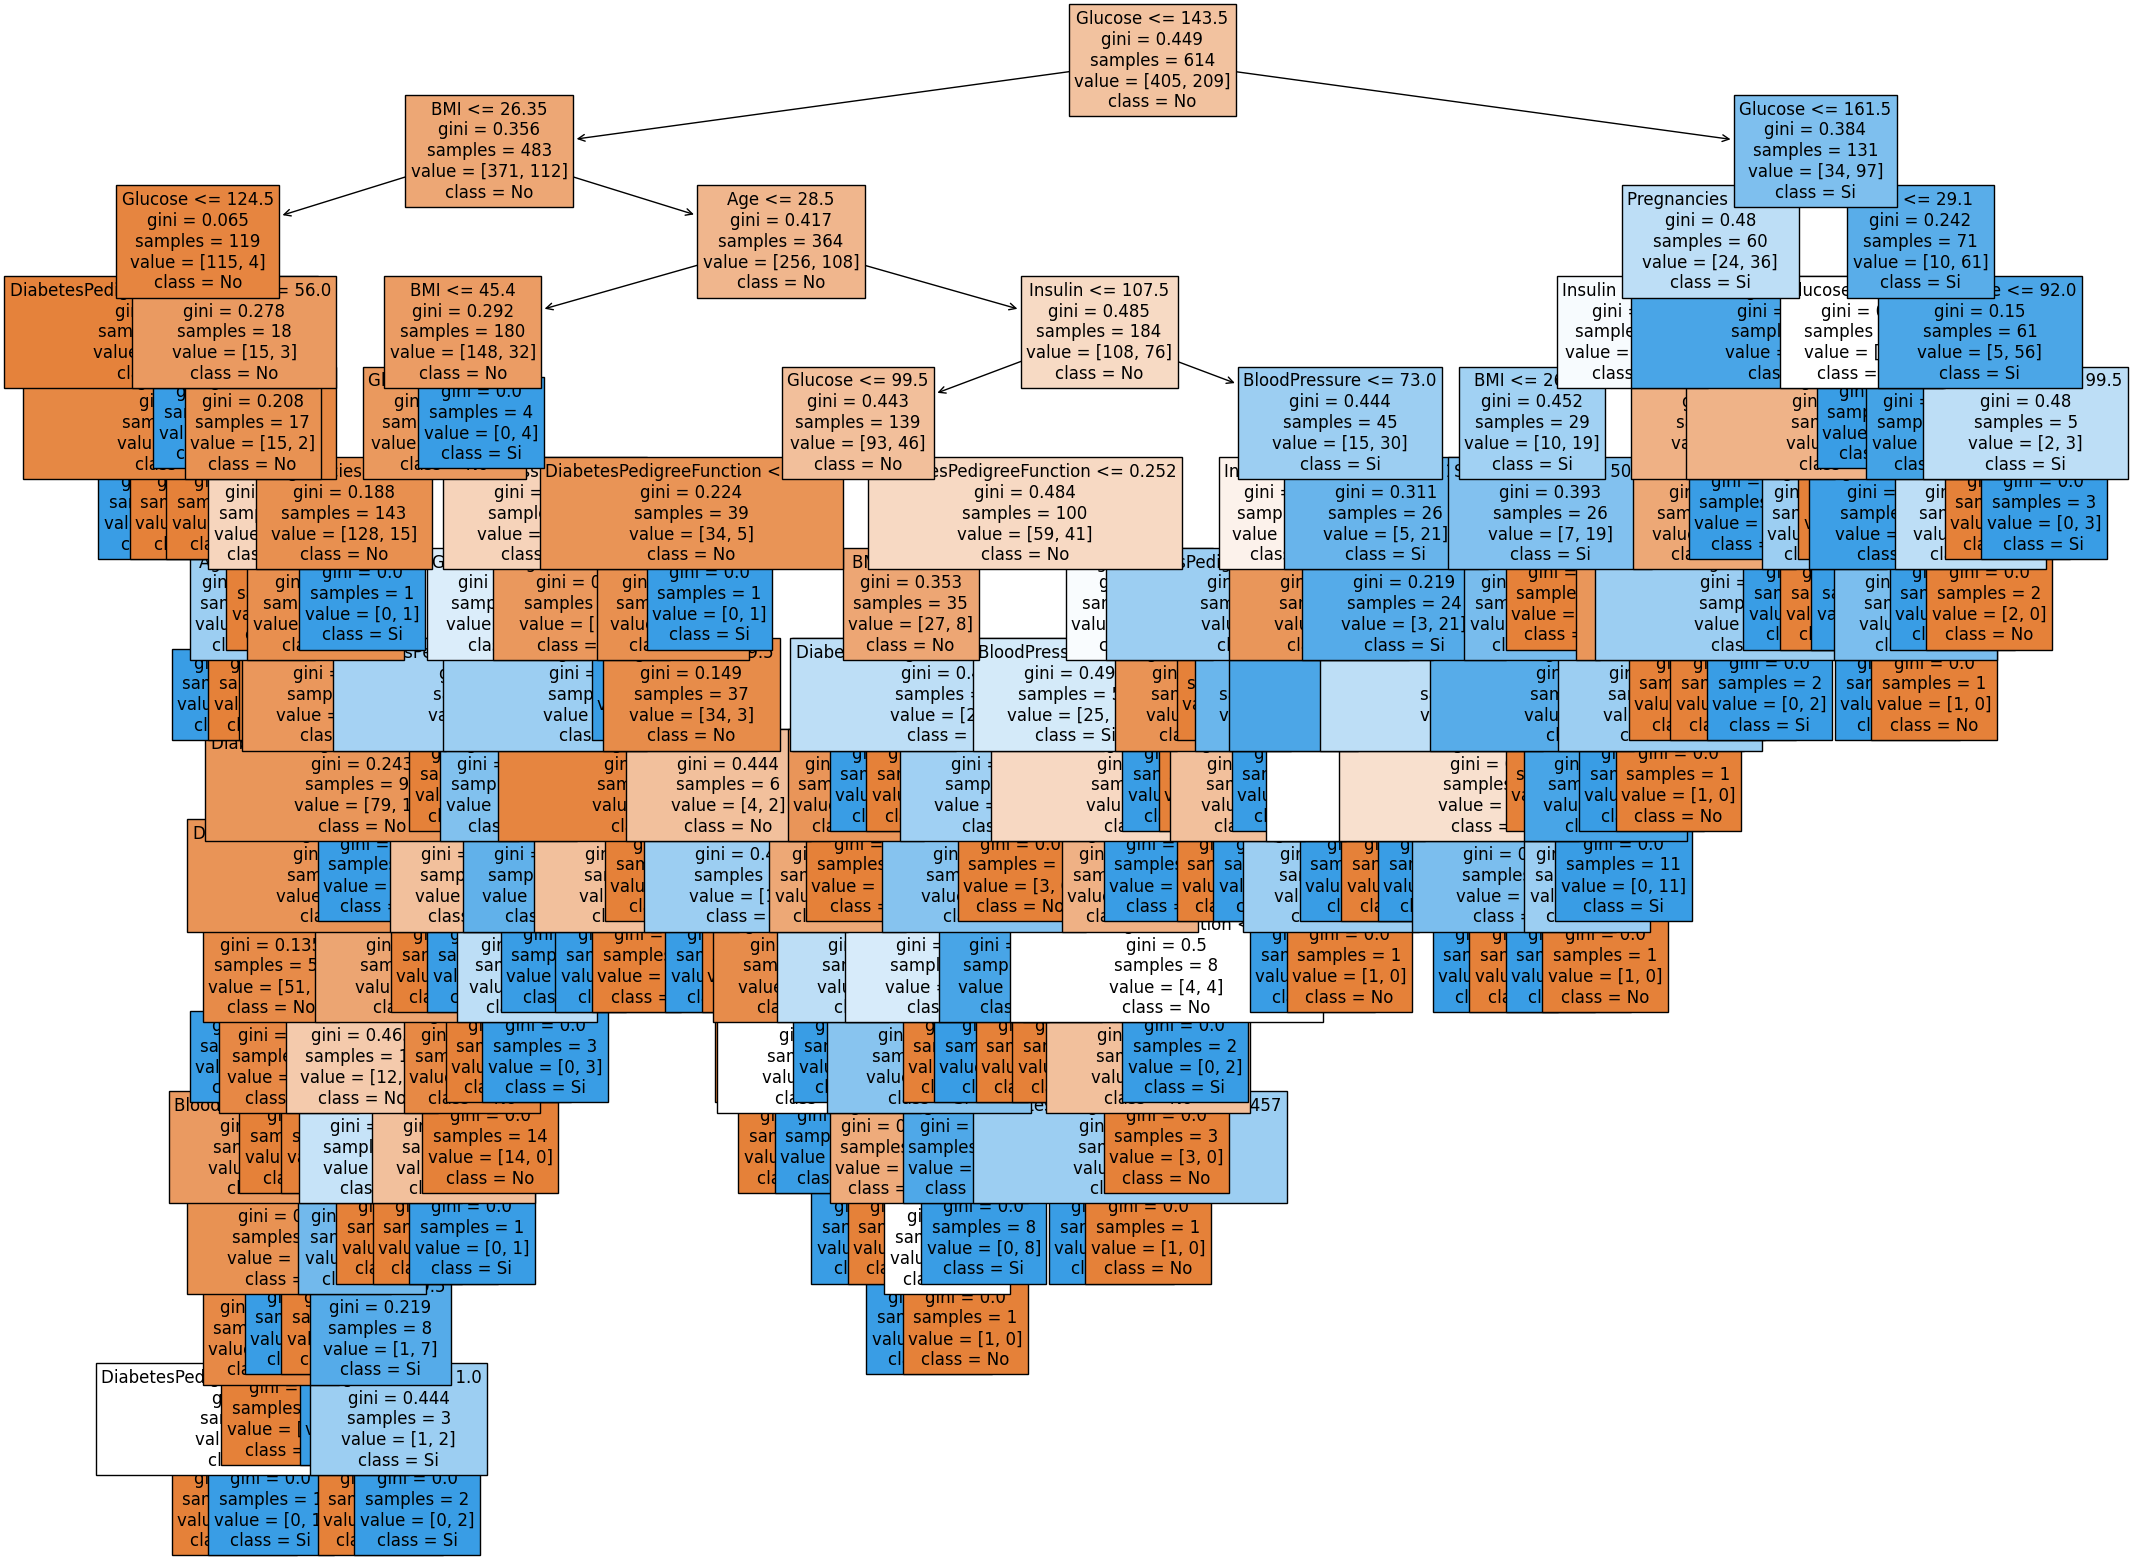

In [30]:
# Obtenemos los nombres de las features (atributos)
feature_names = X.columns

# Graficamos el árbol
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_names,
                  class_names={0:'No', 1:'Si'},
                  filled=True,
                  fontsize=12)

**Conclusiones a partir del gráfico**

Al no tener parámetros el árbol puede extenderse indefinidamente o hasta que la probabilidad de la clase sea 1, es decir, hasta que la pureza de las hojas sea completa.
Esta falta de restricciones en la profundidad puede llevar a un sobreajuste (overfitting) del modelo a los datos de entrenamiento.
Para evitar esto, en el siguiente modelo, vamos a restringir el max_depth

# Modelo 2: Primeros ajustes

---

1. Trabajar valores faltantes (preprocesamiento)
2. Observar las clases en el conjunto de datos para determinar si estan desbalanceadas
3. Crear árbol con restricciones de profundidad

In [94]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**PREPROCESAMIENTO DE LOS DATOS**

In [31]:
# Agrupa por la etiqueta y calcula la mediana para cada columna
medians = df_diabetes.groupby('Outcome')[["Glucose", "BMI", "BloodPressure", "SkinThickness"]].median()

# Itera a través de las columnas de interés
for col in ["Glucose", "BMI", "BloodPressure", "SkinThickness"]:
    # Reemplaza los valores iguales a 0 por las medianas correspondientes
    df_diabetes.loc[(df_diabetes[col] == 0) & (df_diabetes['Outcome'] == 0), col] = medians.loc[0, col]
    df_diabetes.loc[(df_diabetes[col] == 0) & (df_diabetes['Outcome'] == 1), col] = medians.loc[1, col]

In [32]:
medians

,Glucose,BMI,BloodPressure,SkinThickness
Outcome,,,,
0,107.0,30.05,70.0,21.0
1,140.0,34.25,74.0,27.0


In [33]:
# Filtra las filas donde 'Insulin' no sea igual a cero y agrupa por 'Outcome'
filtered_data = df_diabetes[df_diabetes['Insulin'] != 0]

medians2 = filtered_data.groupby('Outcome')['Insulin'].median()

print("Mediana de Insulin para Outcome 0:", medians2.loc[0])
print("Mediana de Insulin para Outcome 1:", medians2.loc[1])
print()
print(medians2)

Mediana de Insulin para Outcome 0: 102.5
Mediana de Insulin para Outcome 1: 169.5

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64


In [34]:
# Define una función que reemplace los ceros en 'Insulin' por la mediana correspondiente
def replace_insulin(row):
    if row['Insulin'] == 0:
        return medians2[row['Outcome']]
    else:
        return row['Insulin']

# Aplica la función a cada fila del DataFrame
df_diabetes['Insulin'] = df_diabetes.apply(replace_insulin, axis=1)

In [35]:
conteo_de_ceros = (df_diabetes.iloc[:, :-1] == 0).sum()

print(conteo_de_ceros)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [36]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,169.5,33.6,0.627,50,1
1,1,85,66,29,102.5,26.6,0.351,31,0
2,8,183,64,27,169.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [43]:
# Separamos en atributos y clases
X = df_diabetes.iloc[:,:-1]
y = df_diabetes['Outcome']

# Dividimos los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

# Creamos el árbol de decisión (sin parámetros)
clf2 = DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(X_train, y_train)

# Realizamos la predicción
predictions2 = clf2.predict(X_test)

### Evaluamos el modelo 2

In [48]:
# Evaluación del modelo 2
print('Accuracy:',round(accuracy_score(y_test, predictions2), 2))
print('Precisión:',round(precision_score(y_test, predictions2),2))
print('Recall score:',round(recall_score(y_test, predictions2),2))
print('F1 score:',round(f1_score(y_test, predictions2),2))

Accuracy: 0.85
Precisión: 0.85
Recall score: 0.71
F1 score: 0.77


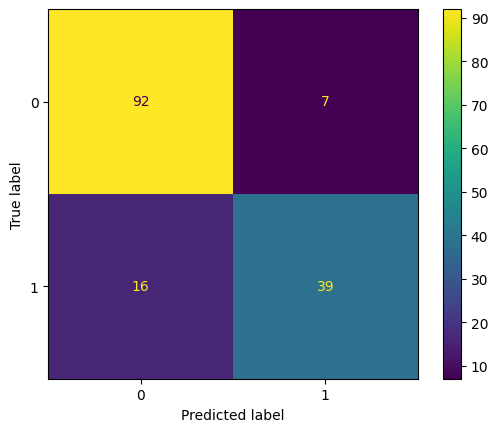

In [46]:
# Matriz de confusión
cm2 = confusion_matrix(y_test, predictions2, labels=[0,1])
ConfusionMatrixDisplay(cm2).plot()
plt.show()

In [45]:
# Reporte de la clasificación 2
print('Reporte de clasificación:\n',classification_report(y_test, predictions2, target_names=['No', 'Si']))

Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.85      0.93      0.89        99
          Si       0.85      0.71      0.77        55

    accuracy                           0.85       154
   macro avg       0.85      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



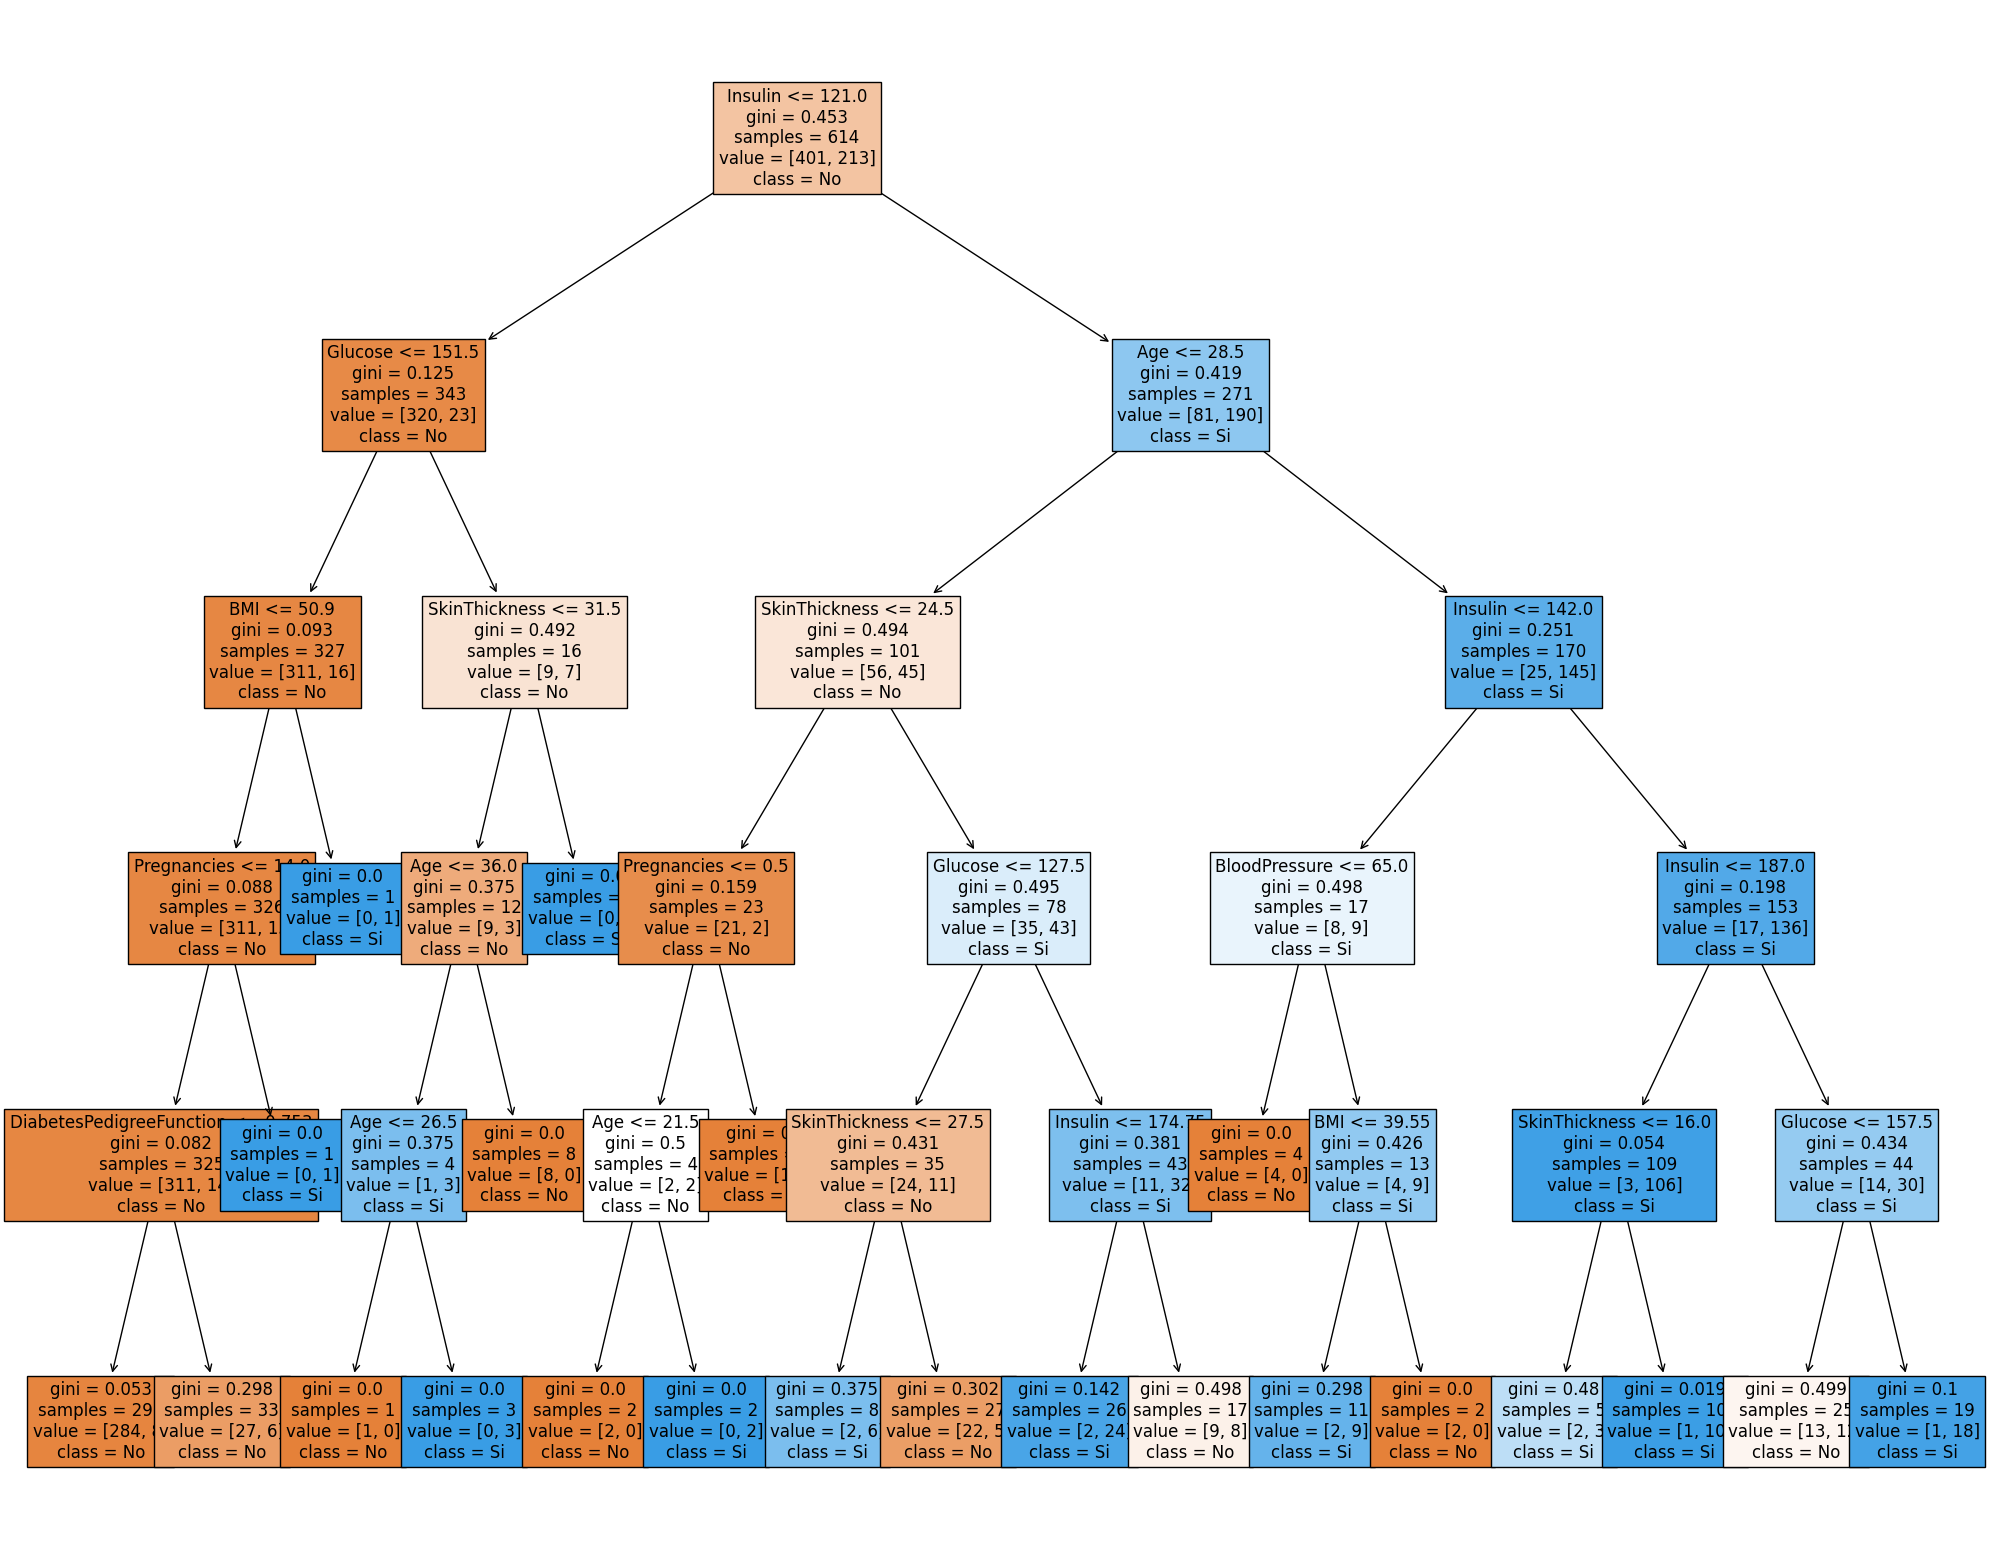

In [44]:
# Graficamos el árbol
fig = plt.figure(figsize=(25,20))
arbol2 = tree.plot_tree(clf2,
                  feature_names=feature_names,
                  class_names={0:'No', 1:'Si'},
                  filled=True,
                  fontsize=12)

**Conclusiones Modelo 2**

Podemos observar que el segundo modelo, con los ajustes realizados, tiene un mejor rendimiento que el anterior. La exactitud es del 85%. 

Se observa que tiene un mejor rendimiento a la hora de predecir la clase No

Especificando el max_depth, podemos observas cómo se simplificó el árbol.

**Siguientes pasos para mejorar el modelo**

---

1. 

## Fine-tune Hyperparameters
![1 gce5WYiqXTibvfSf9Tqn8w.webp](<attachment:1 gce5WYiqXTibvfSf9Tqn8w.webp>)
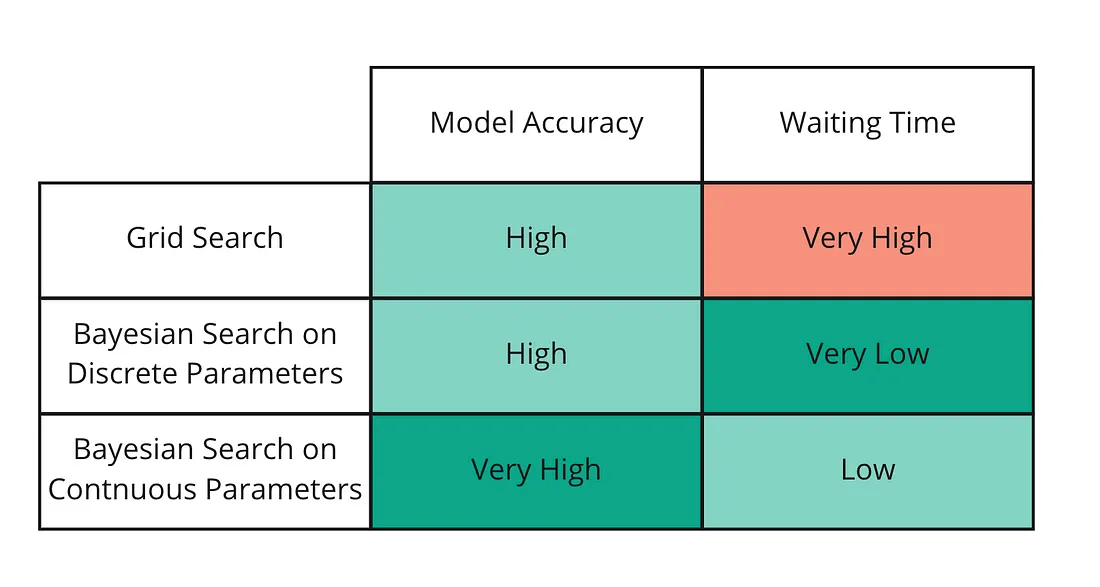